# **Exploratory Data Analysis:Prosper Loan Data**

## **Introduction**

* Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than $23 billion in loans to more than 1,370,000 people.

* Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan between $2,000 and $40,000. 
* Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors.
* This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

* This [data dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&source=editors&ust=1667241167814646&usg=AOvVaw3N_5z6XoymjisPyxlEoU4I) explains all the variables in the dataset

* At the end of this project we expect to understand the motivation towards loan acquisitions and what factors contribute to loan favorability





In [1]:
#Installing the latest matplotlib version
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **Preliminary Wrangling**

In [3]:
#Loading the data
loan_data=pd.read_csv('/content/loandata.csv')
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

The dataset comprises of 81 columns and 11397 rows of data.Some feature selection is required so as to focus on the main aim of the project.

For this,our variables of interest will be
* **ListingCreationDate**: The date the listing was created.
* **ListingNumber** :	The number that uniquely identifies the listing to the public as displayed on the website.
* **ListingCategory (numeric)**: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.
* **BorrowerState**: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
* **isBorrowerHomeowner**: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
* **IncomeRange**: The income range of the borrower at the time the listing was created.
* **IncomeVerifiable**: The borrower indicated they have the required documentation to support their income.
* **DebtToIncomeRatio**: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
* **StatedMonthlyIncome**: The monthly income the borrower stated at the time the listing was created.
* **ProsperRating (Alpha)**: The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.
* **Term**: The length of the loan expressed in months.
* **LoanStatus**: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
* **LoanOriginalAmount**: The origination amount of the loan.
* **BorrowerAPR**: The Borrower's Annual Percentage Rate (APR) for the loan.
Generally, we aim to measure loan favorability in terms of Prosper rating and Annual percentage rate (borrower APR).
* **Recommendations**	:Number of recommendations the borrower had at the time the listing was created.
* **EmploymentStatus** :	The employment status of the borrower at the time they posted the listing.
* **LoanNumber**:	Unique numeric value associated with the loan.
* **InvestmentFromFriendsCount** :Number of recommendations the borrower had at the time the listing was created.


### ***Visual Assessment***

In [5]:
# Create a list of important features
df=loan_data[ ['ListingCreationDate','ListingNumber', 'ListingCategory (numeric)', 'BorrowerState', 'IsBorrowerHomeowner',
                'IncomeRange', 'IncomeVerifiable', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)',
                'EmploymentStatus', 'LoanStatus', 'LoanOriginalAmount', 'BorrowerAPR','Recommendations','LoanNumber','InvestmentFromFriendsCount']]

df.sample(20)              

,ListingCreationDate,ListingNumber,ListingCategory (numeric),BorrowerState,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,DebtToIncomeRatio,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanStatus,LoanOriginalAmount,BorrowerAPR,Recommendations,LoanNumber,InvestmentFromFriendsCount
102992,2014-02-10 15:20:32.417000000,1188401,1,MN,False,"$25,000-49,999",True,0.37,3991.666667,60,C,Employed,Current,15000,0.20372,0,131547,0
3742,2013-09-24 12:29:07.993000000,927362,1,SD,True,"$50,000-74,999",True,0.34,4166.666667,60,C,Employed,Current,15000,0.19988,0,103166,0
22480,2011-09-23 10:41:17.067000000,529022,1,IL,True,"$25,000-49,999",True,0.30,3750.000000,36,A,Employed,Current,5000,0.16056,0,54153,0
113038,2013-07-09 04:36:26.857000000,832504,1,MA,True,"$75,000-99,999",True,0.21,7083.333333,60,A,Employed,Current,19500,0.13942,0,97249,0
50003,2006-08-14 21:18:33.037000000,31397,0,NaN,False,Not displayed,True,0.03,3000.000000,36,NaN,NaN,Completed,1000,0.12759,0,2688,0
102619,2013-07-22 10:58:08.627000000,846786,1,KS,True,"$100,000+",True,0.15,12083.333333,36,C,Employed,Completed,10000,0.21025,0,96606,0
97637,2007-08-21 14:46:31.847000000,190691,0,GA,True,$0,False,NaN,0.000000,36,NaN,Full-time,Chargedoff,15000,0.14910,0,18763,0
26565,2011-12-21 06:04:15.793000000,545936,6,IL,False,"$25,000-49,999",True,0.57,2083.333333,36,E,Employed,FinalPaymentInProgress,2000,0.34577,0,57950,0
57962,2013-10-10 09:31:13.893000000,947885,1,CO,True,"$100,000+",True,0.25,10833.333333,60,D,Employed,Current,3000,0.25625,0,105939,0
31994,2013-12-04 08:35:21.573000000,1067349,1,PA,False,"$25,000-49,999",True,0.52,2587.666667,60,C,Employed,Current,10000,0.21474,0,121490,0


### ***Programmatic Assessment***

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ListingCreationDate         113937 non-null  object 
 1   ListingNumber               113937 non-null  int64  
 2   ListingCategory (numeric)   113937 non-null  int64  
 3   BorrowerState               108422 non-null  object 
 4   IsBorrowerHomeowner         113937 non-null  bool   
 5   IncomeRange                 113937 non-null  object 
 6   IncomeVerifiable            113937 non-null  bool   
 7   DebtToIncomeRatio           105383 non-null  float64
 8   StatedMonthlyIncome         113937 non-null  float64
 9   Term                        113937 non-null  int64  
 10  ProsperRating (Alpha)       84853 non-null   object 
 11  EmploymentStatus            111682 non-null  object 
 12  LoanStatus                  113937 non-null  object 
 13  LoanOriginalAm

In [7]:
#Check for missing data
df.isnull().sum()

ListingCreationDate               0
ListingNumber                     0
ListingCategory (numeric)         0
BorrowerState                  5515
IsBorrowerHomeowner               0
IncomeRange                       0
IncomeVerifiable                  0
DebtToIncomeRatio              8554
StatedMonthlyIncome               0
Term                              0
ProsperRating (Alpha)         29084
EmploymentStatus               2255
LoanStatus                        0
LoanOriginalAmount                0
BorrowerAPR                      25
Recommendations                   0
LoanNumber                        0
InvestmentFromFriendsCount        0
dtype: int64

In [8]:
#Check for duplicates in entire dataset
df.duplicated().sum()

871

In [9]:
#Check for duplicates
for col in df.columns:
    print('{} : {}'.format(col,df[col].duplicated().sum()))

ListingCreationDate : 873
ListingNumber : 871
ListingCategory (numeric) : 113916
BorrowerState : 113885
IsBorrowerHomeowner : 113935
IncomeRange : 113929
IncomeVerifiable : 113935
DebtToIncomeRatio : 112729
StatedMonthlyIncome : 100435
Term : 113934
ProsperRating (Alpha) : 113929
EmploymentStatus : 113928
LoanStatus : 113925
LoanOriginalAmount : 111469
BorrowerAPR : 107259
Recommendations : 113920
LoanNumber : 871
InvestmentFromFriendsCount : 113923


In [10]:
df[df['LoanNumber'].duplicated()]

,ListingCreationDate,ListingNumber,ListingCategory (numeric),BorrowerState,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,DebtToIncomeRatio,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanStatus,LoanOriginalAmount,BorrowerAPR,Recommendations,LoanNumber,InvestmentFromFriendsCount
9,2013-12-02 10:43:39.117000000,1023355,7,IL,True,"$25,000-49,999",True,0.25,3333.333333,36,AA,Employed,Current,10000,0.07620,0,121268,0
999,2013-12-18 14:25:17.053000000,1055932,1,MD,True,"$25,000-49,999",True,0.35,3750.000000,60,B,Employed,Current,10000,0.17710,0,132043,0
2539,2014-01-11 07:50:08.037000000,1097584,1,NJ,True,"$100,000+",True,0.18,10833.333333,60,B,Employed,Current,35000,0.14528,0,135375,0
4942,2013-09-26 09:35:36.317000000,927246,7,MI,True,"$50,000-74,999",True,0.07,4583.333333,36,HR,Employed,Current,4000,0.35356,0,103928,0
5812,2013-09-24 13:27:48.287000000,920397,1,GA,True,"$50,000-74,999",True,0.62,4166.666667,36,C,Other,Current,15000,0.24205,0,110525,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113548,2014-01-23 14:33:25.967000000,1158474,18,CO,True,"$75,000-99,999",True,0.15,7666.666667,60,D,Employed,Current,14000,0.22063,0,134250,0
113636,2013-09-17 11:44:43.177000000,904020,1,WI,True,"$25,000-49,999",True,0.20,2500.000000,36,C,Other,Current,4000,0.21290,0,109434,0
113733,2013-11-07 14:26:31.317000000,1002326,1,WI,False,"$50,000-74,999",True,0.42,4583.333333,60,B,Employed,Current,10000,0.20593,0,110968,0
113773,2013-12-06 05:43:13.830000000,1056749,1,NJ,True,"$25,000-49,999",True,0.36,2720.833333,36,B,Employed,Current,10000,0.16324,0,122984,0


In [11]:
#Investigate unique variables in the columns
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

ListingCreationDate : ['2007-08-26 19:09:29.263000000' '2014-02-27 08:28:07.900000000'
 '2007-01-05 15:00:47.090000000' ... '2013-12-13 05:49:12.703000000'
 '2011-11-14 13:18:26.597000000' '2014-01-15 09:27:37.657000000']
ListingNumber : [ 193129 1209647   81716 ... 1069178  539056 1140093]
ListingCategory (numeric) : [ 0  2 16  1  7 13  6 15 20 19  3 18  8  4 11 14  5  9 17 10 12]
BorrowerState : ['CO' 'GA' 'MN' 'NM' 'KS' 'CA' 'IL' 'MD' nan 'AL' 'AZ' 'VA' 'FL' 'PA' 'OR'
 'MI' 'NY' 'LA' 'WI' 'OH' 'NC' 'WA' 'NV' 'NJ' 'TX' 'AR' 'SC' 'DE' 'MO'
 'NE' 'UT' 'DC' 'MA' 'CT' 'IN' 'KY' 'OK' 'MS' 'WV' 'RI' 'TN' 'ID' 'MT'
 'HI' 'NH' 'VT' 'WY' 'ME' 'AK' 'IA' 'SD' 'ND']
IsBorrowerHomeowner : [ True False]
IncomeRange : ['$25,000-49,999' '$50,000-74,999' 'Not displayed' '$100,000+'
 '$75,000-99,999' '$1-24,999' 'Not employed' '$0']
IncomeVerifiable : [ True False]
DebtToIncomeRatio : [0.17    0.18    0.06    ... 0.3108  0.07419 0.23284]
StatedMonthlyIncome : [ 3083.333333  6125.        2083.333333 ..

In [12]:
#Investigate the data types
df.dtypes

ListingCreationDate            object
ListingNumber                   int64
ListingCategory (numeric)       int64
BorrowerState                  object
IsBorrowerHomeowner              bool
IncomeRange                    object
IncomeVerifiable                 bool
DebtToIncomeRatio             float64
StatedMonthlyIncome           float64
Term                            int64
ProsperRating (Alpha)          object
EmploymentStatus               object
LoanStatus                     object
LoanOriginalAmount              int64
BorrowerAPR                   float64
Recommendations                 int64
LoanNumber                      int64
InvestmentFromFriendsCount      int64
dtype: object

* We have missing data in **BorrowerState** ,**DebtToIncomeRatio**,**ProsperRating (Alpha)** ,**EmploymentStatus** and **BorrowerAPR** columns.
* We have **871** duplicated entries into the dataset.A deep dive into individual columns does not indicate a reason for deduplicating this as they are not unique identifiers save for the **LoanNumber**
* **ListingCreationDate** has the wrong datatype
* **ListingCategory (numeric)** and **ProsperRating (Alpha)** should be renamed
* **ListingCategory (numeric)** can be reverted to the original categories for better understanding on a visual interaction with the datasets
* '*Not Employed*' variable in **IncomeRange**  should be converted to $0
* **ProsperRating** and **IncomeRange** are ordinal variables and should be treated as such
* **BorrowerState** fields should be renamed for easy interpretation

### ***Data Wrangling***

In [13]:
#As a rule of thumb,we should make copies of our data before cleaning
df_clean=df.copy()

**Removing missing data**


As a rule of thumb,we should only drop null values if they represent less than 30% of our data.
Let's investigate this

In [14]:

percent_missing = df_clean.isnull().sum() * 100 / len(df_clean)
missing_value_df = pd.DataFrame({'column_name': df_clean.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing',ignore_index=True)

,column_name,percent_missing
0,ListingCreationDate,0.000000
1,Recommendations,0.000000
2,LoanOriginalAmount,0.000000
3,LoanStatus,0.000000
4,Term,0.000000
5,LoanNumber,0.000000
6,StatedMonthlyIncome,0.000000
7,IncomeRange,0.000000
8,IsBorrowerHomeowner,0.000000
9,ListingCategory (numeric),0.000000


In [15]:
#Dropping missing values
print("Old data frame length:", len(df_clean))
for col in df_clean:
    df_clean = df_clean[df_clean[col].notnull()]
print("Old data frame length:", len(df_clean))   

Old data frame length: 113937
Old data frame length: 77557


In [16]:
df_clean.isnull().any()

ListingCreationDate           False
ListingNumber                 False
ListingCategory (numeric)     False
BorrowerState                 False
IsBorrowerHomeowner           False
IncomeRange                   False
IncomeVerifiable              False
DebtToIncomeRatio             False
StatedMonthlyIncome           False
Term                          False
ProsperRating (Alpha)         False
EmploymentStatus              False
LoanStatus                    False
LoanOriginalAmount            False
BorrowerAPR                   False
Recommendations               False
LoanNumber                    False
InvestmentFromFriendsCount    False
dtype: bool

**Dropping duplicates in LoanNumber**

In [17]:
df_clean = df_clean.drop_duplicates(subset='LoanNumber', keep='first')

df_clean[df_clean['LoanNumber'].duplicated()]

,ListingCreationDate,ListingNumber,ListingCategory (numeric),BorrowerState,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,DebtToIncomeRatio,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanStatus,LoanOriginalAmount,BorrowerAPR,Recommendations,LoanNumber,InvestmentFromFriendsCount


**Converting ListingCreationdate dtypes to datetime**





In [18]:
import datetime
df_clean['ListingCreationDate'] = pd.to_datetime(df_clean.ListingCreationDate)
df_clean.dtypes

ListingCreationDate           datetime64[ns]
ListingNumber                          int64
ListingCategory (numeric)              int64
BorrowerState                         object
IsBorrowerHomeowner                     bool
IncomeRange                           object
IncomeVerifiable                        bool
DebtToIncomeRatio                    float64
StatedMonthlyIncome                  float64
Term                                   int64
ProsperRating (Alpha)                 object
EmploymentStatus                      object
LoanStatus                            object
LoanOriginalAmount                     int64
BorrowerAPR                          float64
Recommendations                        int64
LoanNumber                             int64
InvestmentFromFriendsCount             int64
dtype: object

**Renaming columns**

In [19]:
#Rename the columns
df_clean = df_clean.rename(columns = {'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'})

# verifying changes
for col_name in ['ListingCategory', 'ProsperRating']:
    assert col_name in df_clean.columns

**Categorizing Listing Category (numeric) column**

In [20]:
# Store all the numeric categories and their titles in a dictionary
listing_categories = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
                   4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 
                   9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
                  13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical or Dental', 16 : 'Motorcycle',
                  17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

# Map the dictionary contents to the ListingCategory column

df_clean['ListingCategory'] = df_clean['ListingCategory'].map(listing_categories)

# Preview results
df_clean['ListingCategory'].unique()

array(['Home Improvement', 'Motorcycle', 'Debt Consolidation', 'Other',
       'Household Expenses', 'Auto', 'Medical or Dental', 'Wedding Loans',
       'Vacation', 'Taxes', 'Baby & Adoption', 'Engagement Ring',
       'Business', 'Large Purchases', 'Boat', 'RV', 'Not Available',
       'Cosmetic Procedure', 'Student Use', 'Green Loans'], dtype=object)

**Replacing 'Not Employed' to $0**




In [21]:
df_clean.IncomeRange = df_clean.IncomeRange.str.replace('Not employed', '$0')

# Verify changes
assert 'Not employed' not in df_clean.IncomeRange


**Categorizing 'ProsperRating' and 'IncomeRange'**

In [22]:
# Store the correct variable orders in a dictionary
order_dict = {'ProsperRating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
              'IncomeRange': ['Not displayed','$0', '$1-24,999', '$25,000-49,999', 
                              '$50,000-74,999', '$75,000-99,999', '$100,000+']}

# Assign each column to the proper order
for key, value in order_dict.items():
    correct_order = pd.api.types.CategoricalDtype(categories=value, ordered=True)
    df_clean[key] = df_clean[key].astype(correct_order)

# Verify changes
df_clean[order_dict.keys()].dtypes

ProsperRating    category
IncomeRange      category
dtype: object

**Renaming states in BorrowerState**

In [23]:
#We are going to use a Python Dictionary to translate US States to Two letter codes from  https://gist.github.com/rogerallen/1583593
states = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
states1 = dict(map(reversed, states.items()))
df_clean['State_full'] = df_clean['BorrowerState'].map(states1)

In [24]:
#Verifying changes
df_clean[['State_full','BorrowerState']]

,State_full,BorrowerState
1,Colorado,CO
3,Georgia,GA
4,Minnesota,MN
5,New Mexico,NM
6,Kansas,KS
...,...,...
113932,Illinois,IL
113933,Pennsylvania,PA
113934,Texas,TX
113935,Georgia,GA


In [25]:
#Dropping initial BorrowerState column and renaming 'State_full' to 'BorrowerState'
#Dropping initial BorrowerState column 
#Printing Original Columns
for col in df_clean.columns:
    print(col)
df_clean.drop(['BorrowerState'], axis=1)




ListingCreationDate
ListingNumber
ListingCategory
BorrowerState
IsBorrowerHomeowner
IncomeRange
IncomeVerifiable
DebtToIncomeRatio
StatedMonthlyIncome
Term
ProsperRating
EmploymentStatus
LoanStatus
LoanOriginalAmount
BorrowerAPR
Recommendations
LoanNumber
InvestmentFromFriendsCount
State_full


,ListingCreationDate,ListingNumber,ListingCategory,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,DebtToIncomeRatio,StatedMonthlyIncome,Term,ProsperRating,EmploymentStatus,LoanStatus,LoanOriginalAmount,BorrowerAPR,Recommendations,LoanNumber,InvestmentFromFriendsCount,State_full
1,2014-02-27 08:28:07.900,1209647,Home Improvement,False,"$50,000-74,999",True,0.18,6125.000000,36,A,Employed,Current,10000,0.12016,0,134815,0,Colorado
3,2012-10-22 11:02:35.010,658116,Motorcycle,True,"$25,000-49,999",True,0.15,2875.000000,36,A,Employed,Current,10000,0.12528,0,77296,0,Georgia
4,2013-09-14 18:38:39.097,909464,Home Improvement,True,"$100,000+",True,0.26,9583.333333,36,D,Employed,Current,15000,0.24614,0,102670,0,Minnesota
5,2013-12-14 08:26:37.093,1074836,Debt Consolidation,True,"$100,000+",True,0.36,8333.333333,60,B,Employed,Current,15000,0.15425,0,123257,0,New Mexico
6,2013-04-12 09:52:56.147,750899,Debt Consolidation,False,"$25,000-49,999",True,0.27,2083.333333,36,E,Employed,Current,3000,0.31032,0,88353,0,Kansas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,2013-04-14 05:55:02.663,753087,Debt Consolidation,True,"$50,000-74,999",True,0.13,4333.333333,36,C,Employed,Current,10000,0.22354,0,88485,0,Illinois
113933,2011-11-03 20:42:55.333,537216,Other,True,"$75,000-99,999",True,0.11,8041.666667,36,A,Employed,FinalPaymentInProgress,2000,0.13220,0,55801,0,Pennsylvania
113934,2013-12-13 05:49:12.703,1069178,Debt Consolidation,True,"$25,000-49,999",True,0.51,2875.000000,60,D,Employed,Current,10000,0.23984,0,123122,0,Texas
113935,2011-11-14 13:18:26.597,539056,Home Improvement,True,"$25,000-49,999",True,0.48,3875.000000,60,C,Full-time,Completed,15000,0.28408,0,56401,0,Georgia


In [26]:

#Rename 'State_full' to 'BorrowerState'
df_clean = df_clean.rename(columns = {'State_full': 'State'})
# verifying changes
for col_name in ['State']:
    assert col_name in df_clean.columns

In [27]:
df_clean['State']

1             Colorado
3              Georgia
4            Minnesota
5           New Mexico
6               Kansas
              ...     
113932        Illinois
113933    Pennsylvania
113934           Texas
113935         Georgia
113936        New York
Name: State, Length: 76768, dtype: object

## **Exploratory Data Analysis**

* We will explore our by building univariate, bivariate and multivariate visualizations and utilizing the Question-Visualization-Observations frame work throughout.
* A good place tp start would be to obtain descriptive statistics of our variables 


In [28]:
df_clean.describe()

,ListingNumber,DebtToIncomeRatio,StatedMonthlyIncome,Term,LoanOriginalAmount,BorrowerAPR,Recommendations,LoanNumber,InvestmentFromFriendsCount
count,7.676800e+04,76768.000000,76768.000000,76768.000000,76768.000000,76768.000000,76768.000000,76768.000000,76768.000000
mean,7.761845e+05,0.258692,5964.256138,42.701230,9248.961416,0.223978,0.016452,86857.562695,0.007464
std,2.354251e+05,0.319727,5089.682309,11.710835,6389.782292,0.079291,0.187061,28705.180798,0.107838
min,4.162750e+05,0.000000,0.250000,12.000000,1000.000000,0.045830,0.000000,38045.000000,0.000000
25%,5.613232e+05,0.150000,3528.895833,36.000000,4000.000000,0.162590,0.000000,61502.750000,0.000000
50%,7.458110e+05,0.220000,5000.000000,36.000000,8000.000000,0.215660,0.000000,88373.500000,0.000000
75%,9.794395e+05,0.320000,7166.666667,60.000000,14000.000000,0.287800,0.000000,108945.250000,0.000000
max,1.255149e+06,10.010000,483333.333333,60.000000,35000.000000,0.423950,19.000000,136486.000000,9.000000


### ***Univariate Analysis***

**What is the distribution of  incomes among borrowers**

In [29]:
df_clean['IncomeRange'].value_counts()

$50,000-74,999    23756
$25,000-49,999    21795
$100,000+         13889
$75,000-99,999    13519
$1-24,999          3808
$0                    1
Not displayed         0
Name: IncomeRange, dtype: int64

In [30]:
#Investigating the '$0' 
df_clean[df_clean['IncomeRange']=='$0']

,ListingCreationDate,ListingNumber,ListingCategory,BorrowerState,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,DebtToIncomeRatio,StatedMonthlyIncome,Term,ProsperRating,EmploymentStatus,LoanStatus,LoanOriginalAmount,BorrowerAPR,Recommendations,LoanNumber,InvestmentFromFriendsCount,State
21386,2009-10-21 16:22:08.263,429702,Auto,MN,True,$0,True,0.34,2167.583333,36,D,Not employed,Completed,1000,0.288,0,39271,0,Minnesota


* Clearly from this we can **convert StatedMonthlyIncome** to a yearly income and **replace it with an IncomeRange**.
*The yearly income for this particular borrower is **2601** which **falls in the $1-24,999 category**.
* Further we can drop the ***Not displayed*** range as no one falls here

In [31]:
#Dropping 'Not displayed' row
df_clean=df_clean[df_clean['IncomeRange']!='Not displayed']


# Verify changes
assert 'Not displayed' not in df_clean.IncomeRange

In [32]:
df_clean['IncomeRange'] = df_clean['IncomeRange'].replace('$0','$1-24,999')
# Verify changes
assert '$0' not in df_clean.IncomeRange

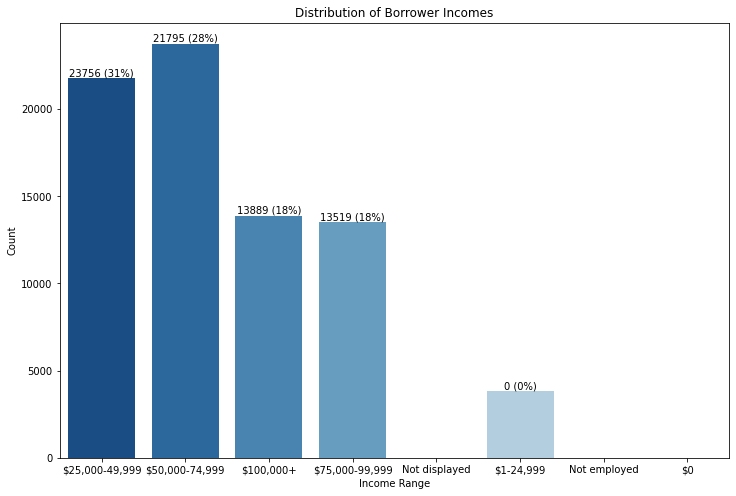

In [33]:
#Plotting the income range


fig, ax = plt.subplots(figsize=(12,8))
ax=sns.countplot(data = df_clean, x = 'IncomeRange', palette = "Blues_r",order=df['IncomeRange'].value_counts(ascending=False).index)

plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Distribution of Borrower Incomes')
ax.tick_params(bottom=True, left=True)
abs_values = df_clean['IncomeRange'].value_counts(ascending=False)
rel_values = df_clean['IncomeRange'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls);

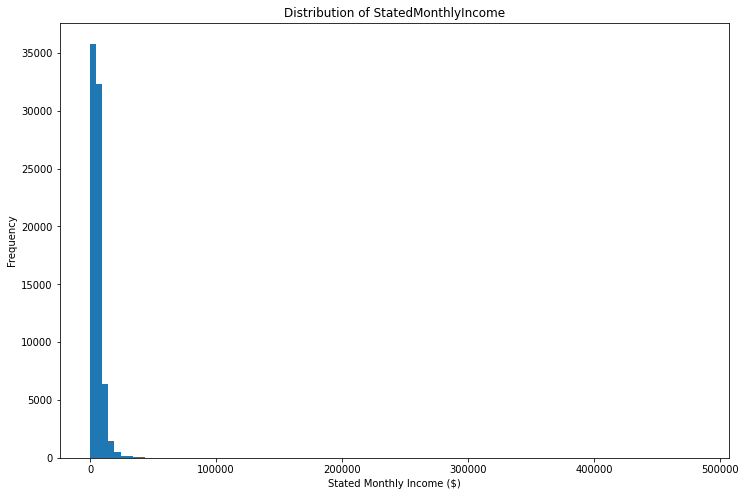

In [34]:
#plotting the monthly incomes
plt.figure(figsize=(12, 8))

# Plot a standard scaled plot

plt.ticklabel_format(style='plain')
plt.hist(data=df_clean, x='StatedMonthlyIncome', bins=100)
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('Frequency')

plt.title('Distribution of StatedMonthlyIncome');

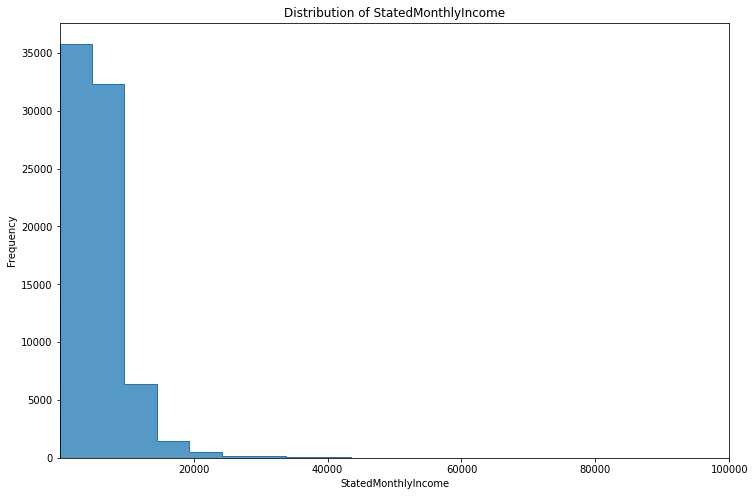

In [35]:
plt.figure(figsize = [12,8])
sns.histplot(data=df_clean, x="StatedMonthlyIncome", bins=100,element='step')
plt.xlim(1, 100000)
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Frequency')

plt.title('Distribution of StatedMonthlyIncome');

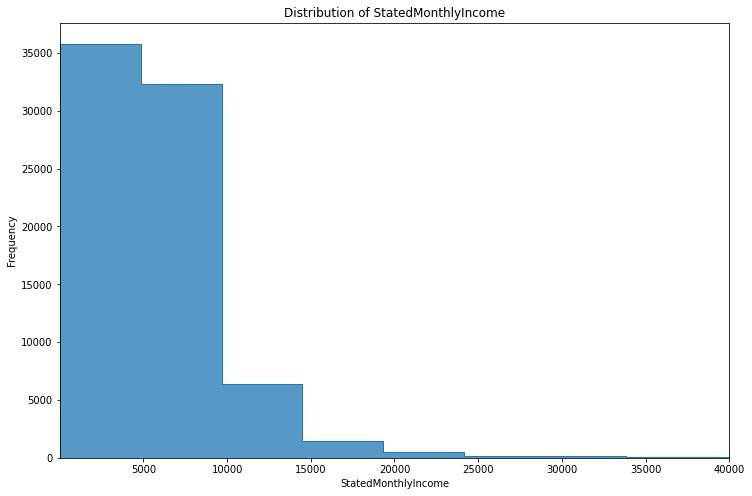

In [36]:
#Zooming in to get a more better picture of the distribution
plt.figure(figsize = [12,8])
sns.histplot(data=df_clean, x="StatedMonthlyIncome", bins=100,element='step')
plt.xlim(1, 40000)
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Frequency')

plt.title('Distribution of StatedMonthlyIncome');

* Most borrowers earn between $25,000-74,999$ yearly with majority in the latter.
* A zoom in on the monthly incomes indicate most borrowers earn less than $10,000$$ on a monthly basis

**How are Borrower APR values distributed, do most of the loans have high or low APR values?**

In [37]:
df_clean['BorrowerAPR'].unique()

array([0.12016, 0.12528, 0.24614, ..., 0.1869 , 0.28979, 0.22674])

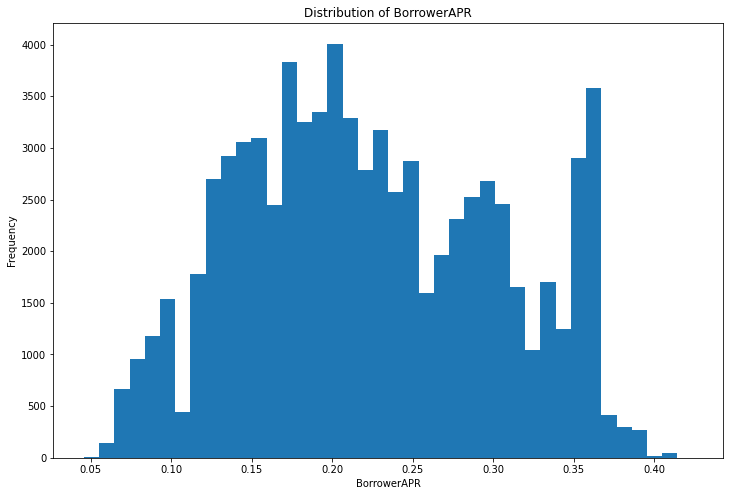

In [38]:
#plotting the monthly incomes
plt.figure(figsize=(12, 8))

# Plot a standard scaled plot

plt.ticklabel_format(style='plain')
plt.hist(data=df_clean, x='BorrowerAPR', bins=40)
plt.xlabel('BorrowerAPR')
plt.ylabel('Frequency')
plt.title('Distribution of BorrowerAPR');

* The Borrower's Annual Percentage Rate (APR) exudes a multimodal distribution with multiple peaks,the highest peak at 0.36.
* Typically,the APR borrowers are charged also depends on their credit. The rates offered to those with excellent credit are significantly lower than those offered to those with bad credit.We will investigate this later

**How is the loan original amount distributed**

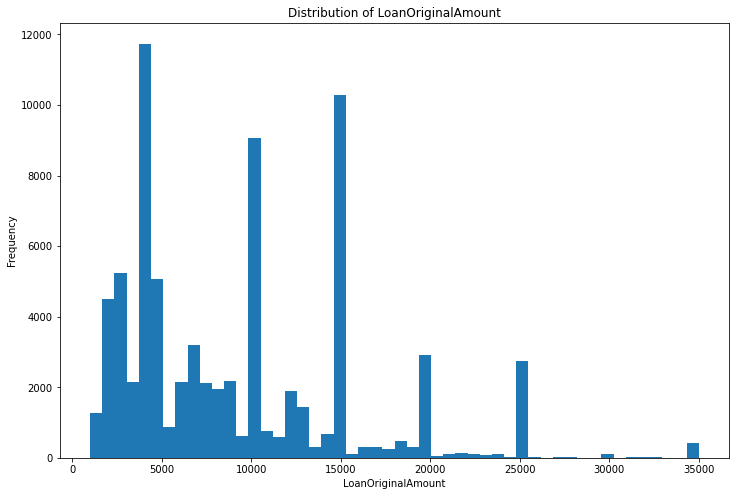

In [39]:

#plotting the LoanOriginalAmount 
plt.figure(figsize=(12, 8))

# Plot a standard scaled plot

plt.ticklabel_format(style='plain')
plt.hist(data=df_clean, x='LoanOriginalAmount', bins=50)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Frequency')
plt.title('Distribution of LoanOriginalAmount');

* We can see the most borrowed amounts are less than $ 15000$
* It would be interesting to see the correspondence of borrowed amount to stated monthly income.We'll investigate this later

**How does the loan term for loans look like**

In [40]:

df_clean['Term'].value_counts()

36    52505
60    22849
12     1414
Name: Term, dtype: int64

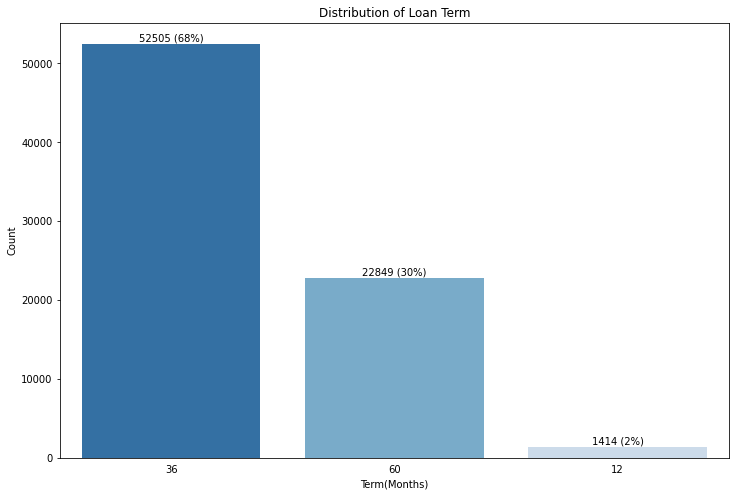

In [41]:
#plotting the loan term

fig, ax = plt.subplots(figsize=(12,8))
ax=sns.countplot(data = df_clean, x = 'Term', palette = "Blues_r",order=df['Term'].value_counts(ascending=False).index)

plt.xlabel('Term(Months)')
plt.ylabel('Count')
plt.title('Distribution of Loan Term')

ax.tick_params(bottom=False, left=True)

abs_values = df_clean['Term'].value_counts(ascending=False)
rel_values = df_clean['Term'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls);

* The loans are categorised into three terms,with the highest at 36 months(3 years),60 months(5 years) & 12 months(1 year) respectively.
* We can see most borrowers opt for longer repayment terms i.e from 3 years and above

**How does the DebtIncome ratio differ among borrowers**

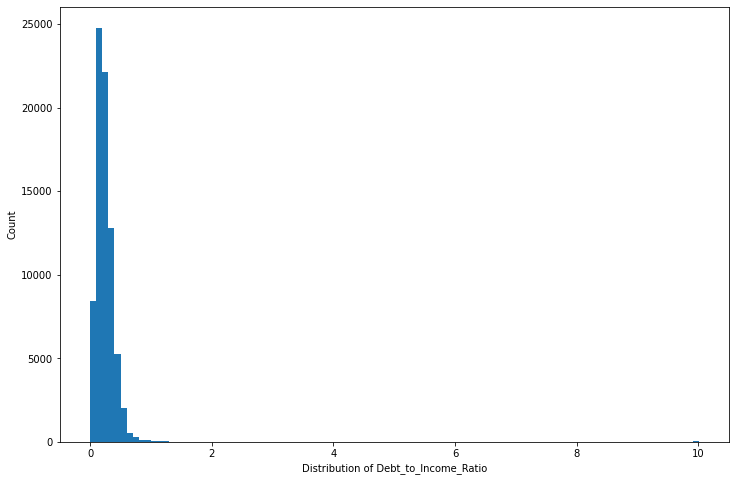

In [42]:
#plotting the debt to income ratio
plt.figure(figsize=(12, 8))

# Plot a standard scaled plot

plt.ticklabel_format(style='plain')
plt.hist(data=df_clean, x='DebtToIncomeRatio', bins=100)
plt.xlabel('Distribution of Debt_to_Income_Ratio')
plt.ylabel('Count');


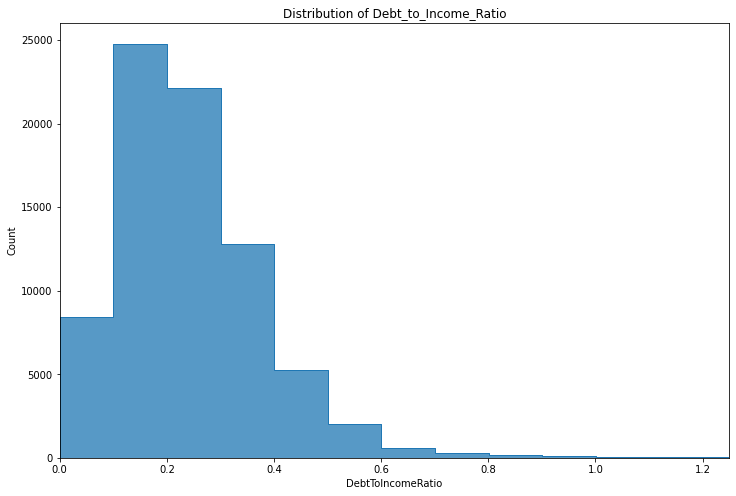

In [43]:
#Zooming in
plt.figure(figsize = [12,8])
sns.histplot(data=df_clean, x="DebtToIncomeRatio", bins=100,element='step')
plt.xlim(0, 1.25)
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('Count')
plt.title('Distribution of Debt_to_Income_Ratio');

* The distribution of Debt_to_Income ratio is right skewed. This can be seen as  most of the values are distributed between 0 and 1.
* Zooming into , we see a peak around 0.20 and 0.25.
* A low Debt_to_Income ratio indicates sufficient income relative to debt servicing, and it makes a borrower more attractive.


**Do borrowers often have many recommendations or friends investing in their loans**

In [44]:

df_clean['Recommendations'].value_counts()

0     75740
1       875
2       129
3        16
5         2
4         2
18        2
19        1
9         1
Name: Recommendations, dtype: int64

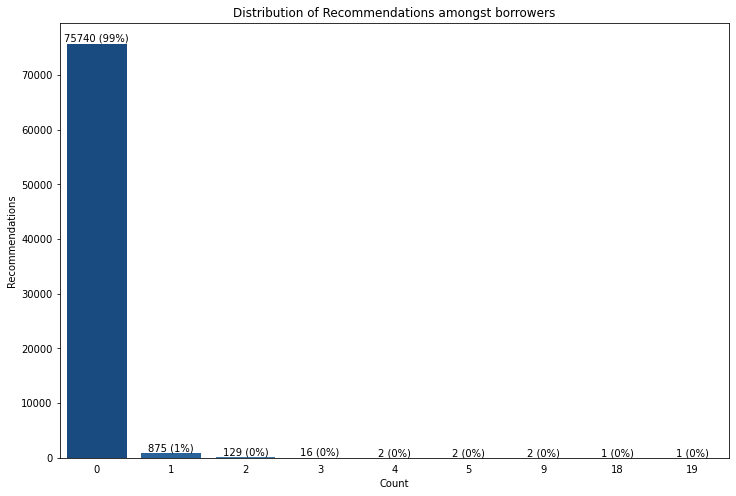

In [45]:
#plotting the recommendations
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.countplot(data = df_clean, x = 'Recommendations', palette = "Blues_r")

plt.ylabel('Recommendations')
plt.xlabel('Count')
plt.title('Distribution of Recommendations amongst borrowers')
ax.tick_params(bottom=False, left=True)

abs_values = df_clean['Recommendations'].value_counts(ascending=False)
rel_values = df_clean['Recommendations'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls);

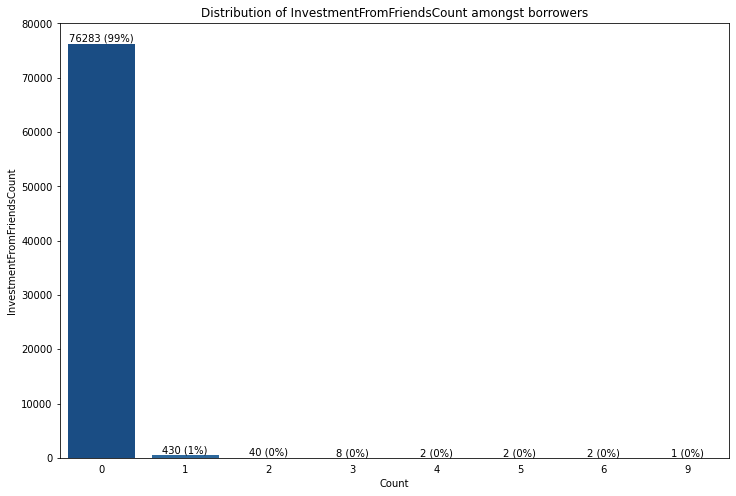

In [46]:
#plotting the recommendations
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.countplot(data = df_clean, x = 'InvestmentFromFriendsCount', palette = "Blues_r")

plt.ylabel('InvestmentFromFriendsCount')
plt.xlabel('Count')
plt.title('Distribution of InvestmentFromFriendsCount amongst borrowers')
ax.tick_params(bottom=False, left=True)

abs_values = df_clean['InvestmentFromFriendsCount'].value_counts(ascending=False)
rel_values = df_clean['InvestmentFromFriendsCount'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls);

99% of borrowers have no recommendations backing up their loan acquisition.
The same is seen , as 99% do not receive InvestmentAmounts from friends 

Having examined the numerical variables,let's dive deeper into the categorical/string columns

**How are borrowers distributed state wise**

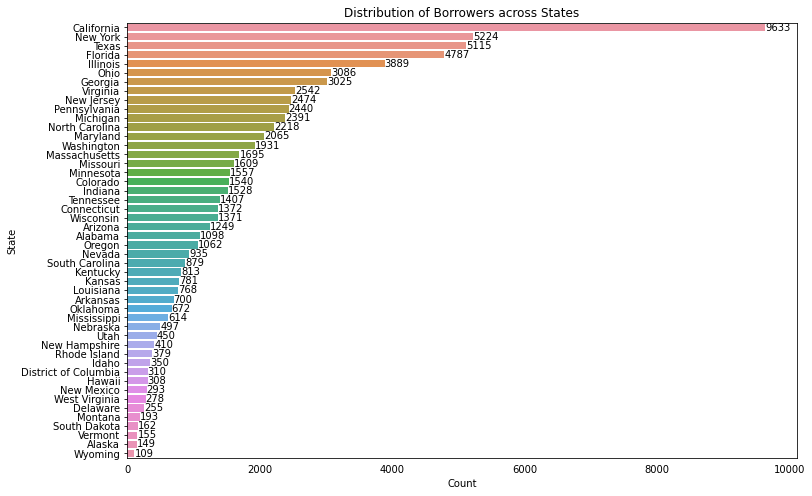

In [47]:
#plotting the recommendations
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.countplot(data = df_clean, y = 'State',orient="v",order=df_clean['State'].value_counts().index)

plt.ylabel('State')
plt.xlabel('Count')
plt.title('Distribution of Borrowers across States')

ax.tick_params(bottom=False, left=True)
ax.bar_label(ax.containers[0]);


* Most Borrowers are located in **California ,Newyork ,Texas & Florida** respectively
* We can see the state with the least borrowers is **Wyoming**
* It worth noting that the Prosper company is based in California. This may explain why the largest number of borrowers originated from that region.

**How does ProsperRating differ across listings**

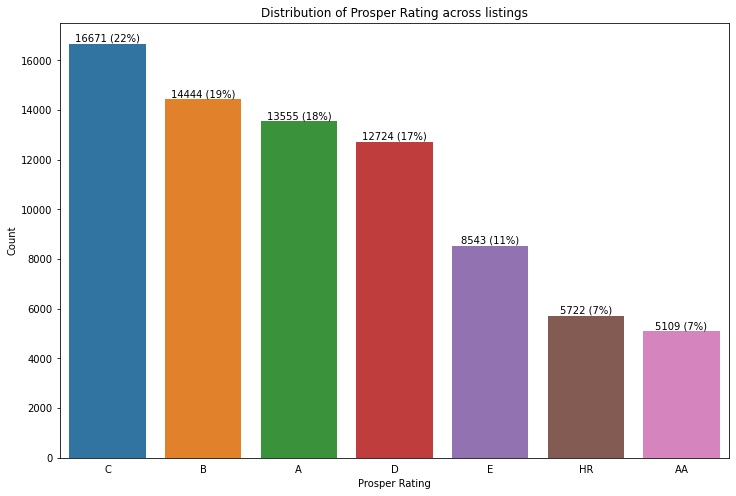

In [48]:
#plotting the recommendations
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.countplot(data = df_clean, x = 'ProsperRating',orient="h",order=df_clean['ProsperRating'].value_counts().index)

plt.ylabel('Count')
plt.xlabel('Prosper Rating')
plt.title('Distribution of Prosper Rating across listings')

ax.tick_params(bottom=False, left=True)

abs_values = df_clean['ProsperRating'].value_counts(ascending=False)
rel_values = df_clean['ProsperRating'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls);

* Prosper Ratings allow potential investors to easily consider a loan application's level of risk because the rating represents an estimated average annualized loss rate range to the investor.
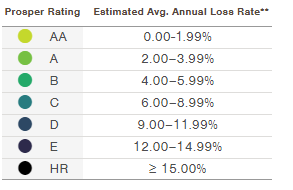
* Most listings are in the C grade at a 21% coverage across all listings,implying a medium risk of default
* We have the least listings on the extreme ends of High Risk & Low Risk

**Are most borrowers employed**

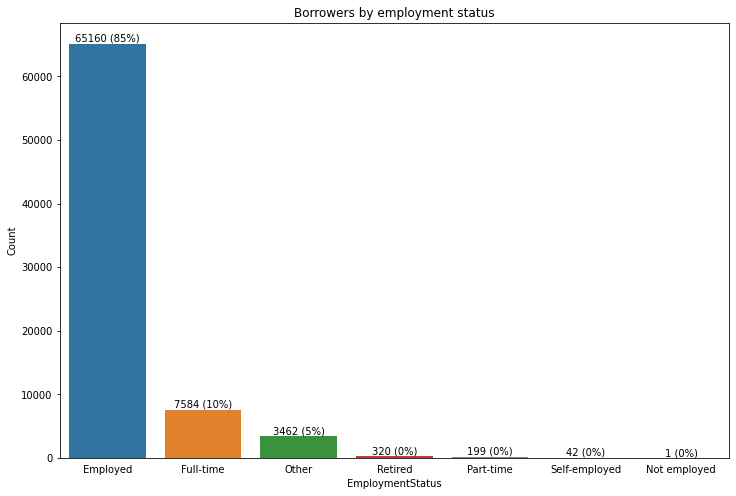

In [49]:
#plotting the employment status
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.countplot(data = df_clean, x = 'EmploymentStatus',order=df_clean['EmploymentStatus'].value_counts().index)

plt.ylabel('Count')
plt.xlabel('EmploymentStatus')
plt.title('Borrowers by employment status')
ax.tick_params(bottom=False, left=True)

abs_values = df_clean['EmploymentStatus'].value_counts(ascending=False)
rel_values = df_clean['EmploymentStatus'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls);

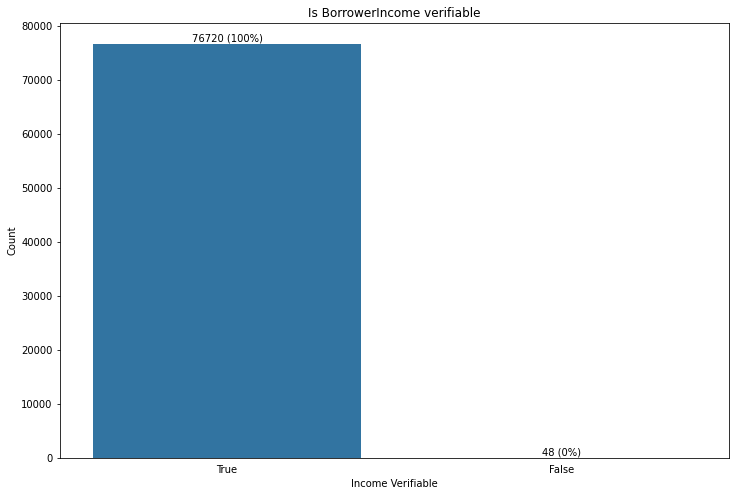

In [50]:
#plotting the IncomeVerifiable
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.countplot(data = df_clean, x = 'IncomeVerifiable',order=df_clean['IncomeVerifiable'].value_counts().index)

plt.ylabel('Count')
plt.xlabel('Income Verifiable')
plt.title('Is BorrowerIncome verifiable')

ax.tick_params(bottom=False, left=True)

abs_values = df_clean['IncomeVerifiable'].value_counts(ascending=False)
rel_values = df_clean['IncomeVerifiable'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls);

* 85% of borrowers are employed,with none unemployed.
* Creditors generally prefer borrowers who have a job and steady income so they can be confident any debt will be paid back,it would be interesting to see if this is verifiable through the income
* 99 % of borrower income is verifiable which backs up the huge percentage of employed borrowers


**Are borrowers home owners**

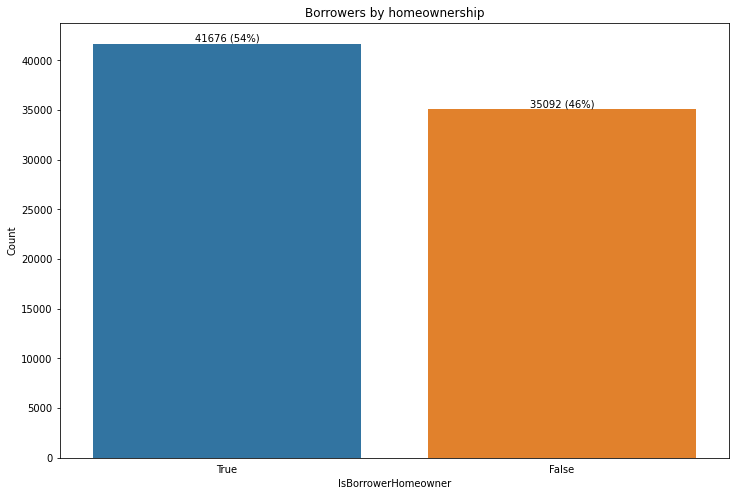

In [51]:
#plotting the homeowenrship
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.countplot(data = df_clean, x = 'IsBorrowerHomeowner',order=df_clean['IsBorrowerHomeowner'].value_counts().index)

plt.ylabel('Count')
plt.xlabel('IsBorrowerHomeowner')
plt.title('Borrowers by homeownership')

ax.tick_params(bottom=False, left=True)

abs_values = df_clean['IsBorrowerHomeowner'].value_counts(ascending=False)
rel_values = df_clean['IsBorrowerHomeowner'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls);

* More than half of borrowers are home owners.
* Let's compare this to the reason for borrowing

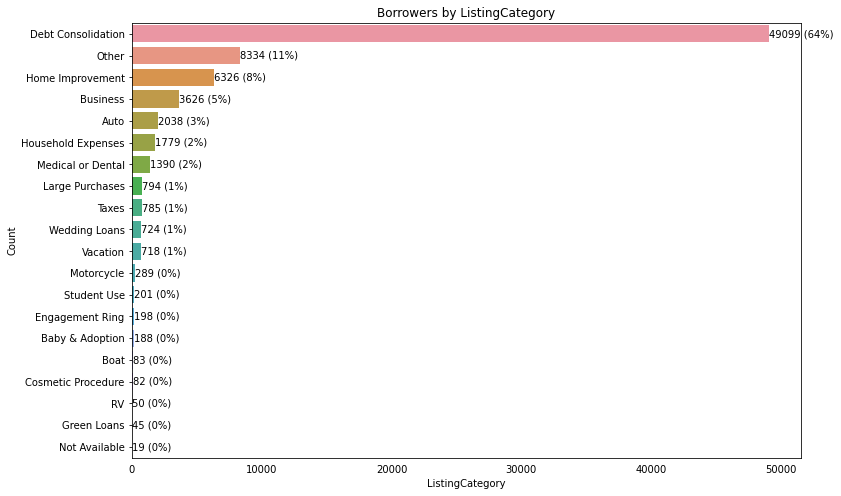

In [52]:
#plotting the homeowenrship
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.countplot(data = df_clean, y = 'ListingCategory',order=df_clean['ListingCategory'].value_counts().index)

plt.ylabel('Count')
plt.xlabel('ListingCategory')
plt.title('Borrowers by ListingCategory')

ax.tick_params(bottom=False, left=True)

abs_values = df_clean['ListingCategory'].value_counts(ascending=False)
rel_values = df_clean['ListingCategory'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls);

It's interesting to see more than half of borrowers ,take up loans to pay other debts,followed by other reasons,Home Improvement and Business reasons


**Do most loans get approved**


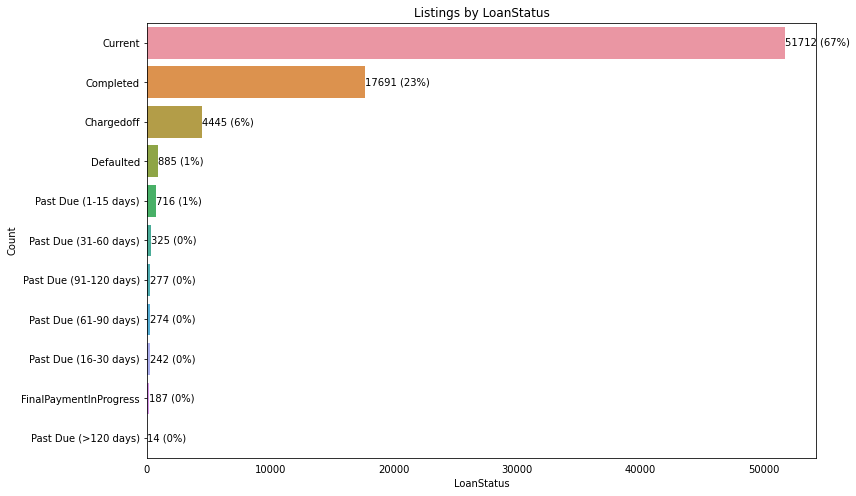

In [53]:
#plotting the homeowenrship
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.countplot(data = df_clean, y = 'LoanStatus',order=df_clean['LoanStatus'].value_counts().index)

plt.ylabel('Count')
plt.xlabel('LoanStatus')
plt.title('Listings by LoanStatus')

ax.tick_params(bottom=False, left=True)

abs_values = df_clean['LoanStatus'].value_counts(ascending=False)
rel_values = df_clean['LoanStatus'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls);

* Out of  more than 50000 loans,23% of this have been completed,with the greatest of current loans at 67.4%.
* It would be interesting to corelate this to the ProsperRating on whether the  medium risk listings are most of which have been completed or not.


### ***Bivariate Analysis***

Let us begin by investigating the relationship between ProsperRating by Loan status

**How does the listings risk differ across loan status**

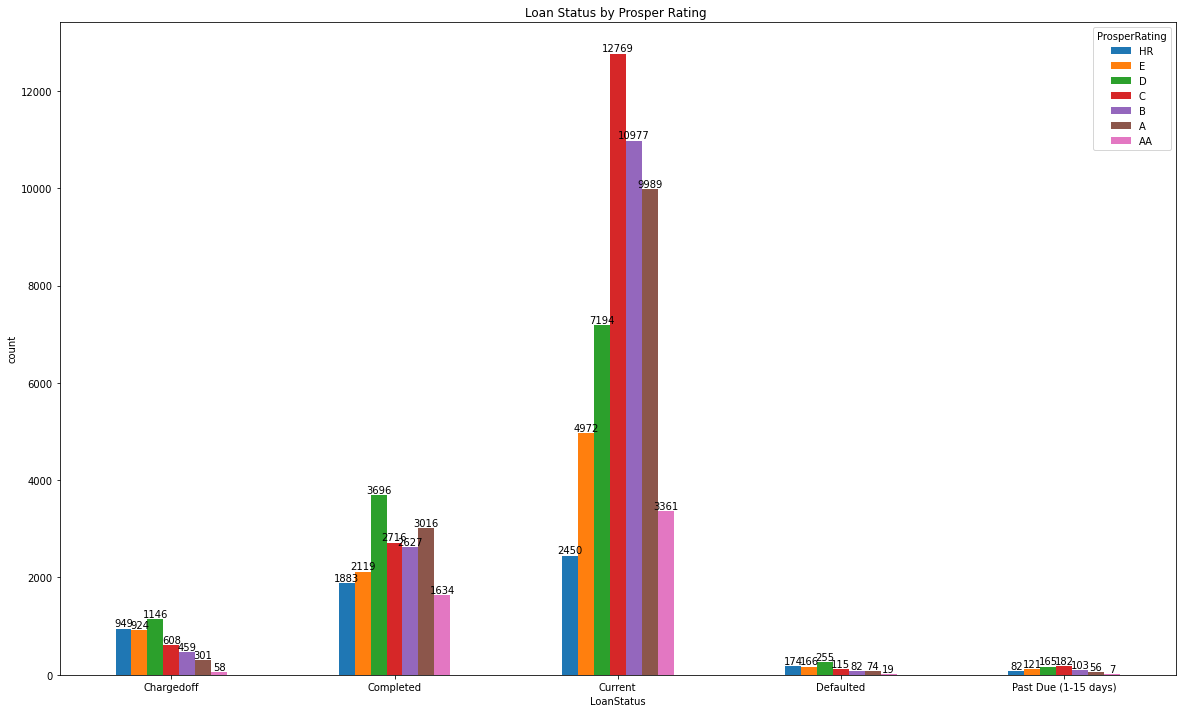

In [54]:
#Subset data to get loan status with data
df=df_clean[df_clean['LoanStatus'].isin(['Current', 'Past Due (1-15 days)', 'Defaulted', 'Completed','Chargedoff'])]

#Plot crosstabulation
ct = pd.crosstab( df.LoanStatus,df.ProsperRating)
    
ax = ct.plot(kind='bar', stacked=False, rot=0,figsize=(20,12),title='Loan Status by Prosper Rating ',ylabel='count')


# add annotations 
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='edge')

* From the defaulted loans,the most defaulted loans are medium risk-high risk,which is an accurate prediction from the ProsperRating.
* This phenomenon also spans across Chargedoff loans as well as Past Due loans 
* The least completed loans are extremely low risk  and extremely high risk  respectively

**How is the loan status affected by employment status of borrowers**

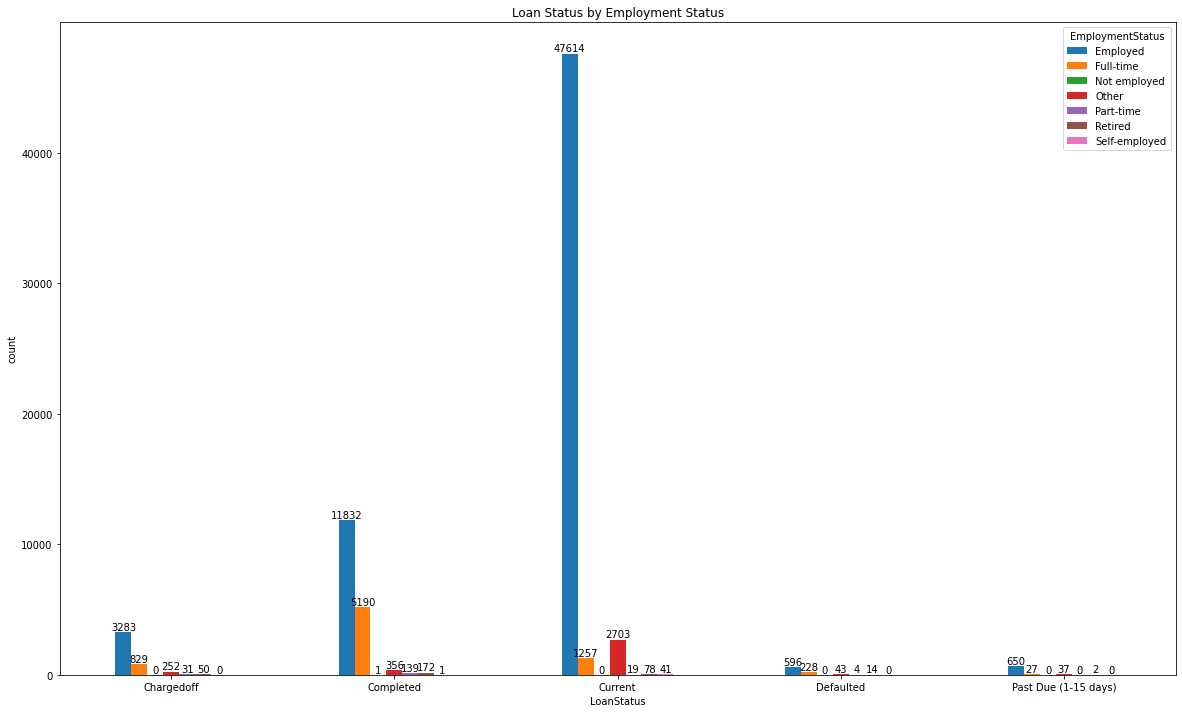

In [55]:

#Plot crosstabulation
ct = pd.crosstab(df.LoanStatus,df.EmploymentStatus)  
ax = ct.plot(kind='bar', stacked=False, rot=0,figsize=(20,12),title='Loan Status by Employment Status',ylabel='count')
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='edge')

As seen in our univariate analysis,most of our data is in current status,so we can't conclude much ,but from the defaulted,employed/full time typically default than other employment status.

**Are lengthier loans prone to default**

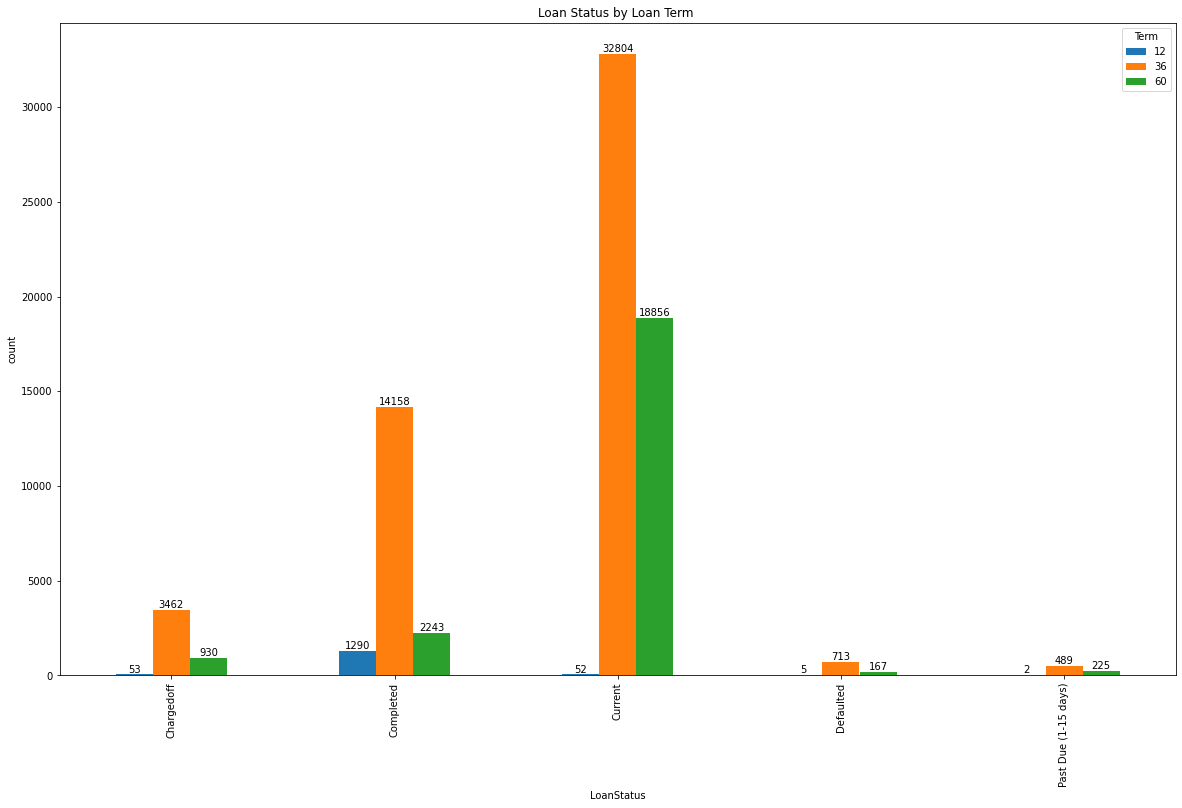

In [56]:

#Plot crosstabulation
ct = pd.crosstab(df.LoanStatus,df.Term)  
ax = ct.plot(kind='bar', stacked=False, rot=90,figsize=(20,12),title='Loan Status by Loan Term ',ylabel='count')
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='edge')

* We can see,past one year,the longer the term,the lesser the default on the loan

**Which listing categories drive lengthier loan terms**

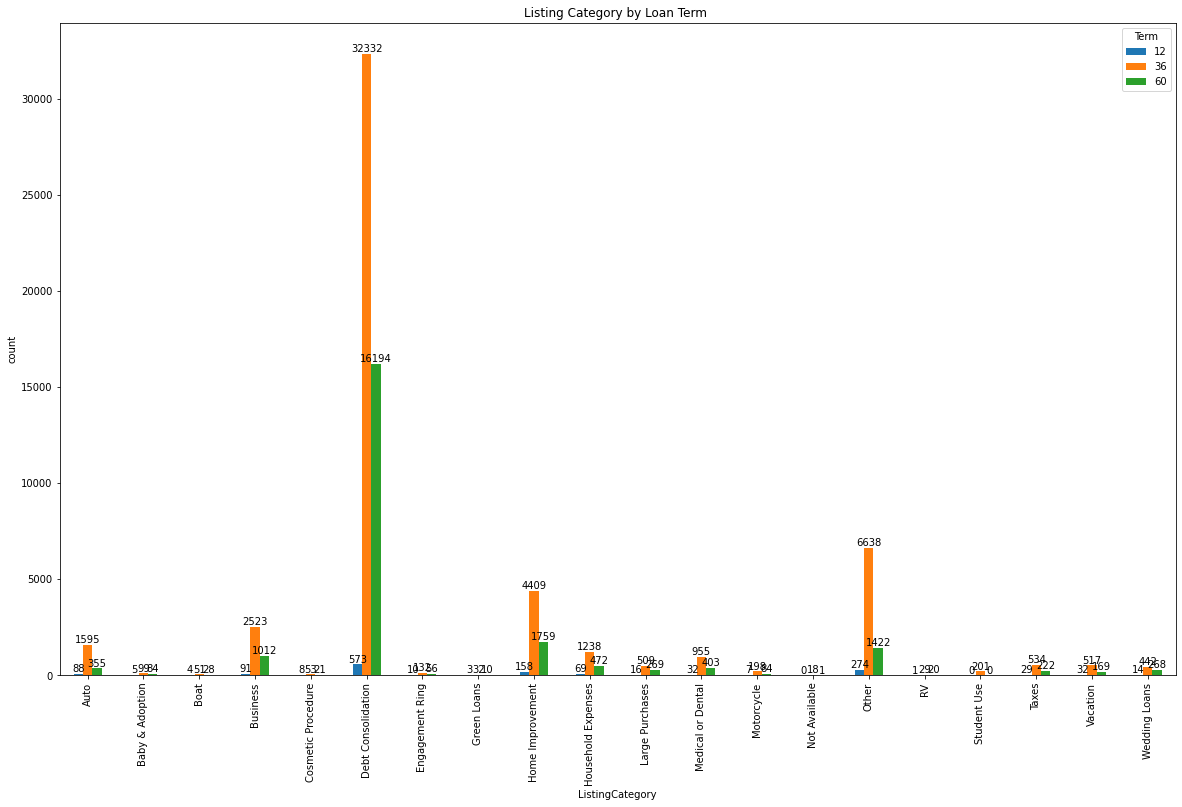

In [57]:

#Plot crosstabulation
ct = pd.crosstab(df_clean.ListingCategory,df_clean.Term)  
ax = ct.plot(kind='bar', stacked=False, rot=90,figsize=(20,12),title='Listing Category by Loan Term ',ylabel='count')
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='edge')

* The majority of listings whose term is >1 year,fall in the Debt Consolidation category.
* Borrowers acquire short term loans to finance debt obligations,other reasons and home improvement categories.

Let us investigate pairwise correlations of numeric columns

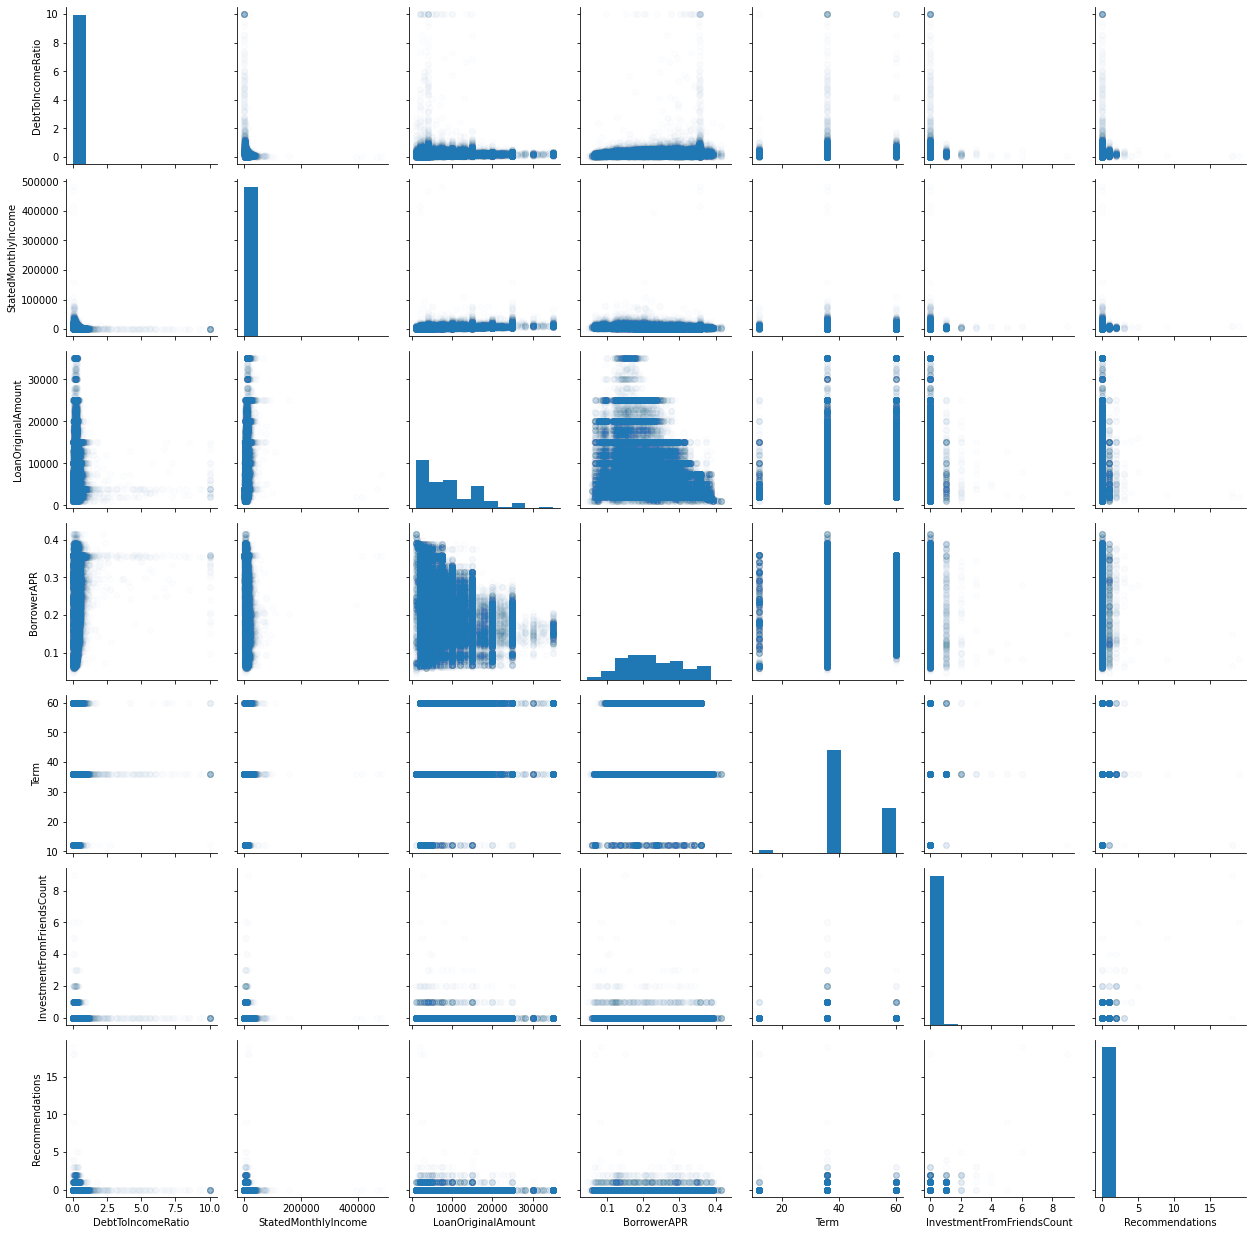

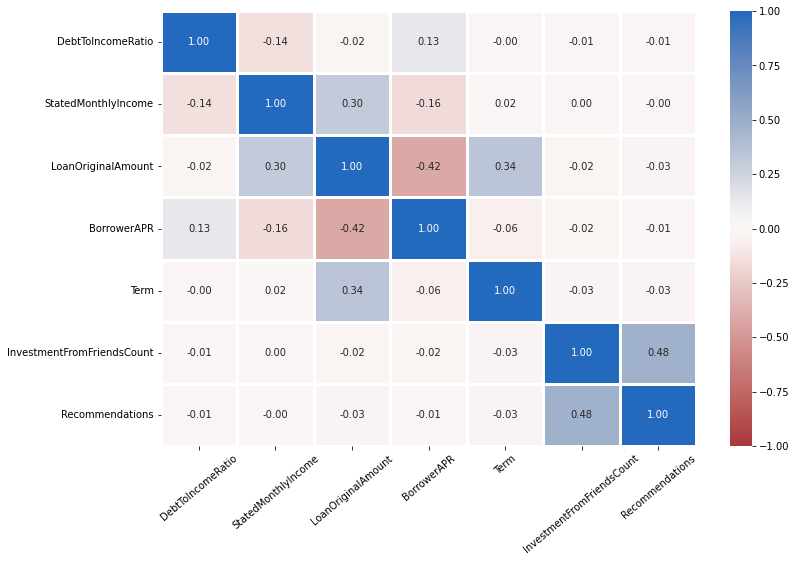

In [58]:
# Store numeric column names in a list
numeric_cols = ['DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'BorrowerAPR', 'Term','InvestmentFromFriendsCount',
                'Recommendations']

# Create a scatterplot of each numeric variable against the other
fig = sns.PairGrid(df_clean[numeric_cols])
fig.map_diag(plt.hist)
fig.map_offdiag(plt.scatter, alpha=0.01);

# Visualize the correlation between the numeric variables with a heatmap
plt.figure(figsize= (12, 8))
sns.heatmap(data=df_clean[numeric_cols].corr(), annot=True, fmt='.2f', 
            cmap='vlag_r', vmin=-1, vmax=1, linewidth=3)
plt.xticks(rotation=40);


* We can see a positive correlation between
  *  LoanOriginalAmount & Term
  *  LoanOriginalAmount & StatedMonthlyIncome
  * InvestmentFromFriendsCount & Recommendations
  * DebtToIncomeRatio & BorrowerAPR

### ***Multivariate Analysis***

**How does BorrowerAPR and the ProsperRating differ across defaulted loans**

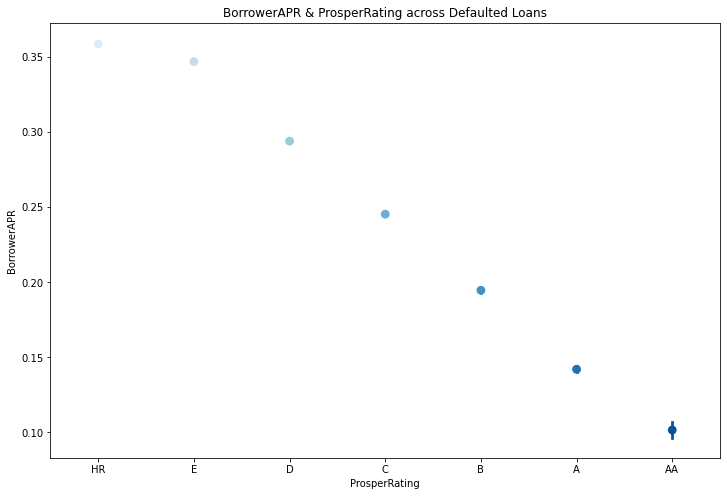

In [59]:
#Subset data to get defaulted loans
defaulted=df_clean[df_clean['LoanStatus'].isin([ 'Past Due (1-15 days)', 'Defaulted', 'Chargedoff'])]
#plotting
plt.figure(figsize = [12,8])
sns.pointplot(data = defaulted, x = 'ProsperRating', y = 'BorrowerAPR', 
                  palette = 'Blues', linestyles = '', dodge=True)
plt.title('BorrowerAPR & ProsperRating across Defaulted Loans')
plt.ylabel('BorrowerAPR');

* The higher the risk,the higher the Borrower APR which is true when we subset the defaulted loans.
* Since risk is high,we expect a higher interest charged on loans as a hedge for high risk volatility


**How does the loan amount and APR differ across loan term**

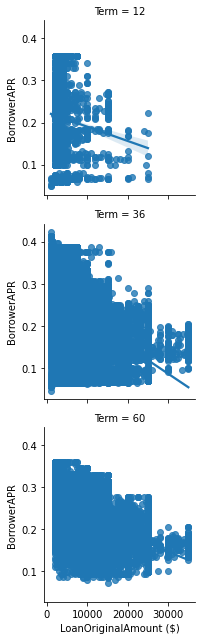

In [60]:
# create faceted scatter plots on levels of the Term variable
ax = sns.FacetGrid(data = df_clean, col = 'Term', col_wrap = 1, height = 3)
ax.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR')
ax.set_xlabels('LoanOriginalAmount ($)')
ax.set_ylabels('BorrowerAPR');


* There's an inverse relationship between BorrowerAPR & Loan Amount as loan term increases
* The lower the borrowed amount ,the longer the term,the higher the interest rate

**Effect of ProsperRating on BorrowerAPR & LoanAmount**

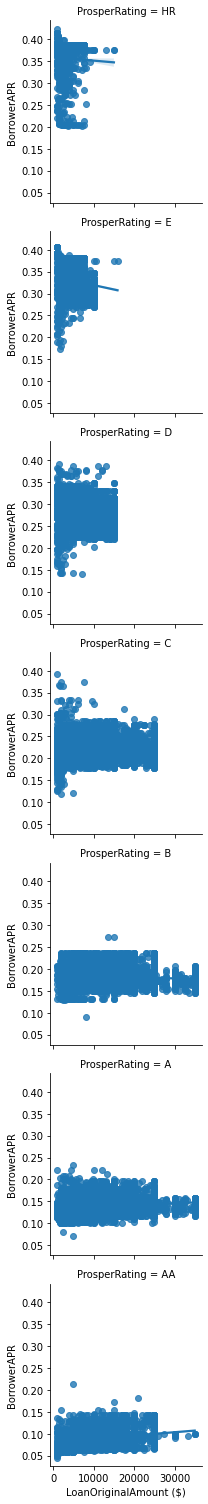

In [61]:
# create faceted scatter plots on levels of the ProsperRating variable
ax = sns.FacetGrid(data = df_clean, col = 'ProsperRating', col_wrap = 1, height = 3)
ax.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR')
ax.set_xlabels('LoanOriginalAmount ($)')
ax.set_ylabels('BorrowerAPR');


The higher the risk,the lower the loan amount ,the higher the APR

## **Conclusion**
This exploration of Prosper loan data was aimed at identifying the different borrower motivations when applying for loans, including the different factors that may influence loan favorability.

* Unexpectedly,majority of borrowers take up loans for the purpose of debt consolidation.This is followed by other reasons,Home Improvement and Business reasons.

* Using the Borrower APR to measure loan favorability, a discovery was made.The higher the risk,the lower the loan amount ,the higher the APR

* There's an inverse relationship between BorrowerAPR & Loan Amount as loan term increases
* The lower the borrowed amount ,the longer the term,the higher the interest rate
* It is interesting that past one year,the longer the term,the lesser the default on the loan,you would expect the opposite.However the inverse relationship with loan amount backs this up,as we see the loan amount is lesser in this case as term increases
